In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop


In [10]:

%matplotlib inline
import matplotlib.pyplot as plt

In [17]:
#loading mnist data from keras
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [14]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [18]:
n_class= 10
#Reshape and change the type as float
#28*28=784
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#Normalizing train and test inputs
x_train /=255
x_test /=255

#labeling the categorical labels
y_train = keras.utils.to_categorical(y_train, n_class)
y_test = keras.utils.to_categorical(y_test, n_class)



In [19]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000, 10), (10000, 10))

Epoch 1/10
375/375 [==============================] - 2s 6ms/step - loss: 0.4001 - accuracy: 0.8849 - val_loss: 0.3033 - val_accuracy: 0.9172
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3092 - accuracy: 0.9112 - val_loss: 0.2877 - val_accuracy: 0.9214
Epoch 3/10
375/375 [==============================] - 2s 6ms/step - loss: 0.2961 - accuracy: 0.9171 - val_loss: 0.2707 - val_accuracy: 0.9259
Epoch 4/10
375/375 [==============================] - 2s 6ms/step - loss: 0.2871 - accuracy: 0.9201 - val_loss: 0.2888 - val_accuracy: 0.9222
Epoch 5/10
375/375 [==============================] - 2s 6ms/step - loss: 0.2830 - accuracy: 0.9211 - val_loss: 0.2713 - val_accuracy: 0.9273
Epoch 6/10
375/375 [==============================] - 2s 6ms/step - loss: 0.2777 - accuracy: 0.9230 - val_loss: 0.2803 - val_accuracy: 0.9252
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.2739 - accuracy: 0.9237 - val_loss: 0.2876 - val_accuracy: 0.9201
Epoch 

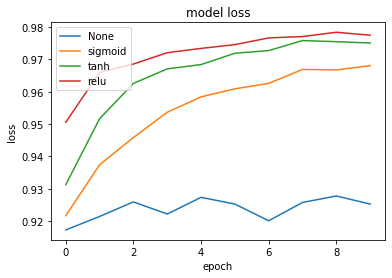

In [22]:
activation_perf={}
(inputShape, num_class, act_list)= (784,), 10 ,[None, 'sigmoid', 'tanh', 'relu']
for act in act_list:
    model = Sequential()
    model.add(Dense(256, input_shape=inputShape, activation= act, name='Layer_1'))
    model.add(Dense(num_class,activation= 'softmax', name='Layer_2'))
        
    model.compile(loss='categorical_crossentropy', optimizer= RMSprop(), metrics = ['accuracy'])
        
    history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=10,
                    verbose=1,
                    validation_split=0.2)
        
    test_loss, test_acc = model.evaluate(x_test, y_test)
    activation_perf[act]=test_acc
        
    plt.plot(history.history['val_accuracy'])
    
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['None', 'sigmoid', 'tanh', 'relu'], loc='upper left')
        

In [23]:
activation_perf

{None: 0.9223999977111816,
 'sigmoid': 0.97079998254776,
 'tanh': 0.977400004863739,
 'relu': 0.9775999784469604}